In [21]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><br><br><br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
World Development Indicators</p><br><br><br><br><br>

In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [24]:
data.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907


### How many UNIQUE country names are there ?

In [25]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [26]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [27]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [28]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

# Let us plot some parameters

In [29]:
# Filter 1

# Picks years of choice
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [30]:
# Filter 2 

# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [31]:
countryFilter

['Spain', 'Vanuatu']

In [32]:
# Filter 3

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Profit tax (% of commercial profits)']

In [33]:
filteredData1 = []
filteredData2 = []

In [34]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''

while(len(filteredData1) < len(yearsFilter)-1):
    #pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


Skipping ... ['Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)'] since very few rows (3) found
Skipping ... ['International tourism, expenditures for passenger transport items (current US$)'] since very few rows (4) found


In [35]:
# What did we pick eventually ?

indicatorsFilter

['International tourism, expenditures for passenger transport items (current US$)']

In [36]:
len(filteredData1)

4

In [37]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

Skipping ... Morocco, since very few rows (4) found


In [38]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [39]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [40]:
filteredData1

,CountryName,IndicatorName,Year,Value
4866953,Argentina,"International tourism, expenditures for passen...",2010,1.497000e+09
5052151,Argentina,"International tourism, expenditures for passen...",2011,1.935000e+09
5228272,Argentina,"International tourism, expenditures for passen...",2012,2.350000e+09
5401070,Argentina,"International tourism, expenditures for passen...",2013,2.581000e+09


In [41]:
filteredData2

,CountryName,IndicatorName,Year,Value
4964396,Morocco,"International tourism, expenditures for passen...",2010,676000000.0
5144231,Morocco,"International tourism, expenditures for passen...",2011,897000000.0
5319806,Morocco,"International tourism, expenditures for passen...",2012,842000000.0
5482262,Morocco,"International tourism, expenditures for passen...",2013,684000000.0


# Matplotlib

## Example 1: Plotting country data

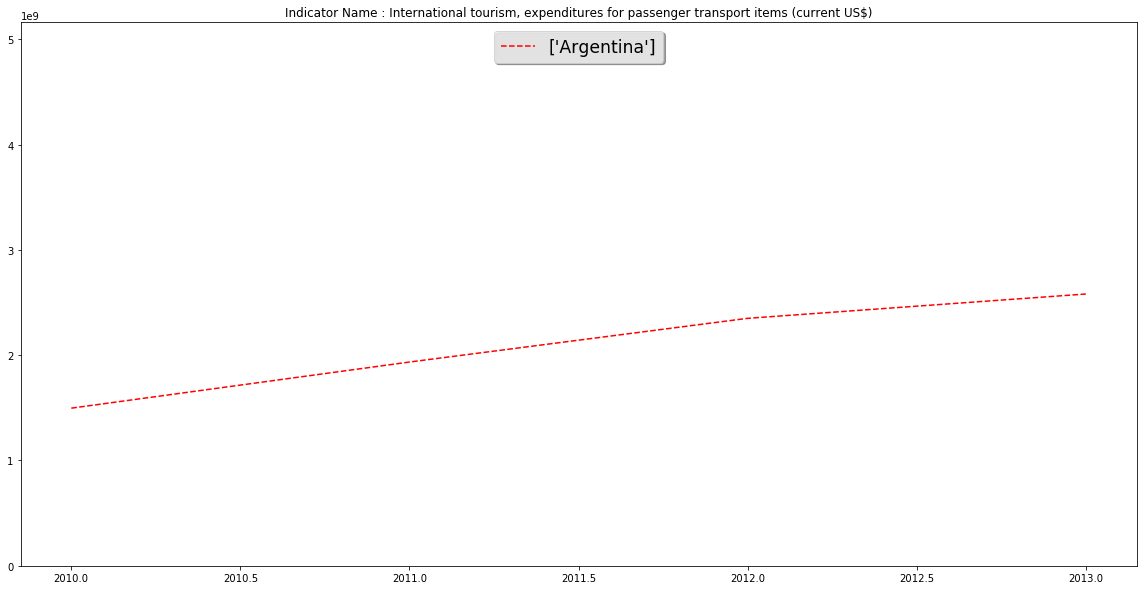

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

## Let's plot country #2

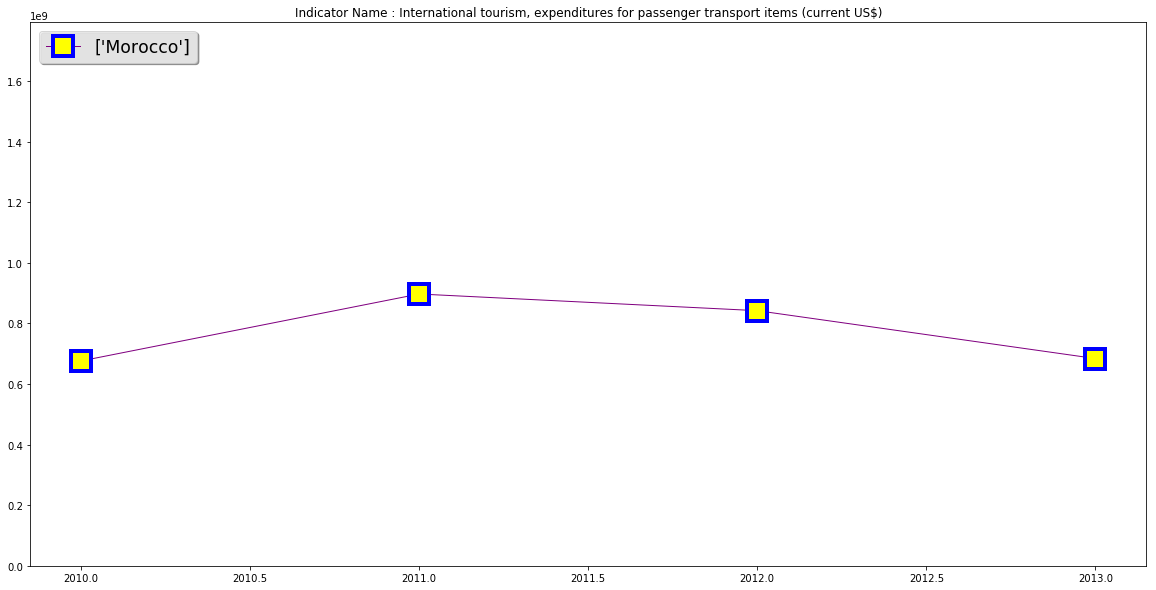

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# Example 2 (random datasets)

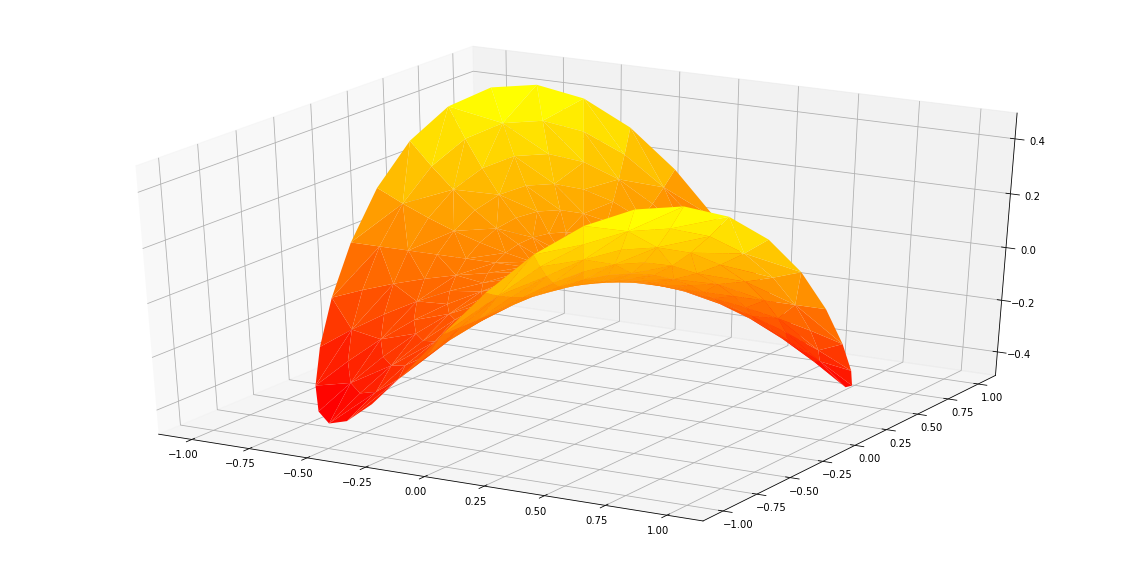

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()

# Example 3 (random dataset)

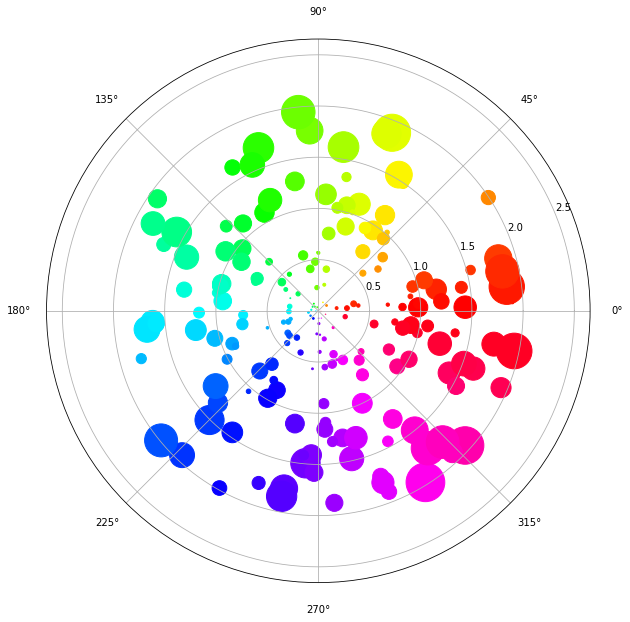

In [61]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()

# Example 4: Box Plots (random datasets)

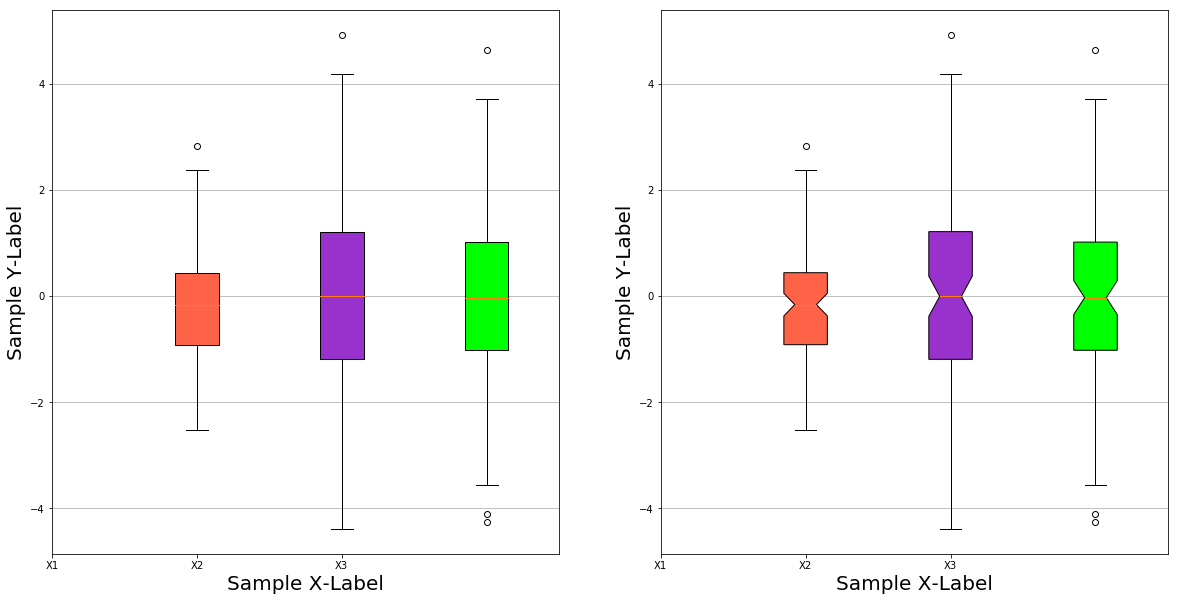

In [62]:
np.random.seed(452)

# Three ararys of 100 points each
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Concatenate the three arrays
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: Notch Shape
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color

# Box plot: Rectangular 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # vertical aligmnent
                         patch_artist=True)   # color




colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Grid lines, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Sample X-Label',fontsize=20)
    axis.set_ylabel('Sample Y-Label',fontsize=20)

    
# Xtick labels
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html